### ברוכים הבאים לתרגיל המסכם של Linear Regression
### בתרגיל הזה אתם תצטרכו לחזות את המחיר שבהם נמכרו בתים בבוסטון בשנות ה-70

### יבאו את seaborn, matplotlib, pandas, numpy והריצו את הפקודה שגורמת לגרפים שיצרנו להופיע

### תטענו את קובץ המידע של הבתים בבוסטון שנמצא בתיקיה notebooks/linear_regression והציגו את ההתחלה שלו

In [31]:
data = 
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### המידע שאנחנו רואים:

### עבור כל כמה בתים באיזור מסויים עם מאפיינים דומים, נלקחו השדות הבאים:


* CRIM: אחוז הפשיעה בשכונה 
* ZN: עבור בתים עם מעל 25,000 מטר רבוע, כמה אחוז מהשטח בנוי (לא גינה). 
* INDUS: כמה אחוז מהבתים בשכונה שייכים לעסקים. 
* CHAS: אם הבתים קרובים לאגם - 1, אם לא - 0. 
* NOX: זיהום אוויר. 
* RM: מספר חדרים ממוצע של הבתים. 
* AGE: אחוז החדרים בבתים שנבנו לפני 1940. 
* DIS: כמה רחוקים אזורי תעשייה מהבתים. 
* TAX: כמה מס הבתים משלמים עבור כל 10,000 דולר. 
* PTRATIO: היחס בין מורים לתלמידים בבתי ספר בשכונה. 
* B: מדד לכמות השחורים בשכונה ככל ש B גבוה יותר, היו פחות שחורים. לא נעים, אבל ב1970 הייתה גזענות חריפה בארצות הברית וזה השפיע מאוד על מחירי הדירות..
* LSTAT: אחוז מהאוכלוסיה ששייכת לשכבות מוחלשות. 
* MEDV: מכיר הבית החציוני באלפי דולרים (מחיר הבית שבמכר במחיר האמצעי מבין הקבוצה). החציון של הקבוצה הראשונה שווה 24,000 דולר. פעם היה זול..

### תפעילו את פונקצית describe כדי לראות את תחום הערכים של המאפיינים

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560262,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### הערת צד: נצטרך לשים עין על שני מאפיינים: ZN, CHAS.

* ZN: החציון שלו הוא 0. זאת אומרת שיותר מחצי מהבתים לא בגודל שבו המשתנה הזה בכלל אומר משהו
* CHAS: יותר משלושה רבעים מהבתים לא קרובים לאגם. 

נסתכל בהמשך איך להתייחס אליהם. האם שווה להשתמש בהם בכל זאת? נחליט על סמך גרפים נוספים.

### נרצה לראות האם המאפיינים שלנו מתפלגים נורמלית.

### יש לנו 14 מאפיינים. שרטטו 7 שורות שבכל אחת מהן 2 גרפים של התפלגויות. כל גרף עבור מאפיין אחר.

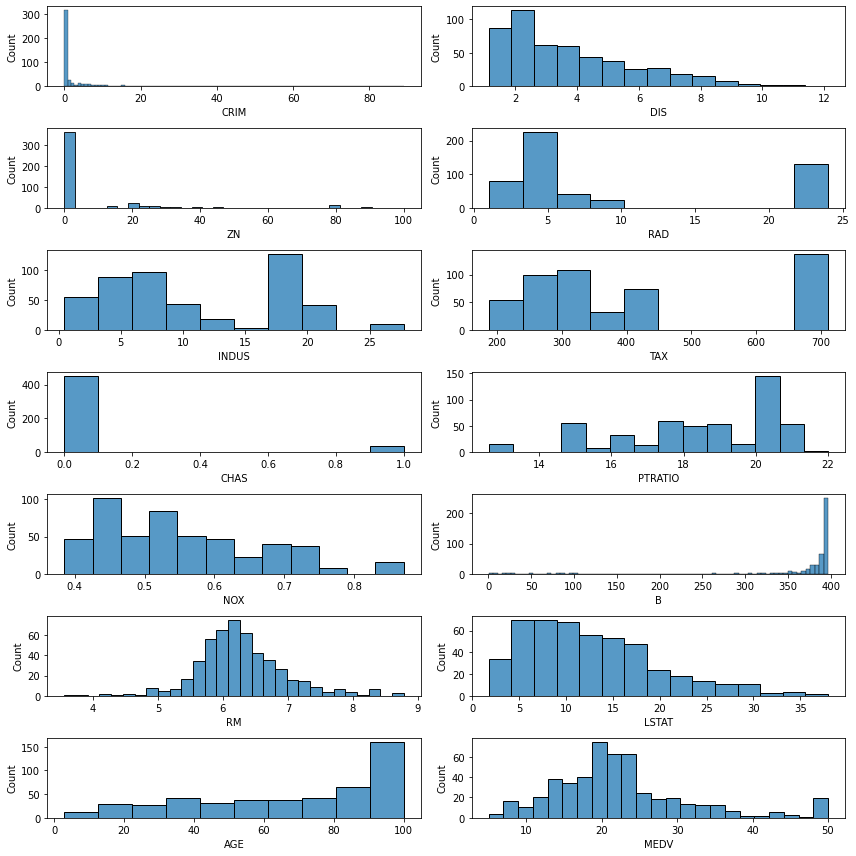

### חלק מהמאפיינים מתפלגים נורמלית אבל גם הרבה לא. אם נחליט להשתמש במאפיין שלא מתפלג נורמלית נצטרך להפעיל פונקציה על כל הערכים שלו כך שהיחס ביניהם ישמר, אך גם יתפלג נורמלית. דרך נפוצה היא פונקציית ה-log (לוגריתם).

###  הציגו את מטריצת הקורלציה בין המאפיינים, ושמרו אותה במשתנה

In [34]:
corr_matrix = 
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


### תעברו על היחס בין כל המאפיינים לבין המחיר - MEDV.

עבור כל מאפיין, תחשבו האם הקורלציה הגיונית או לא. קורלציה חיובית אומרת שככל שהמאפיין גדול יותר, כך מחיר הבית יקר יותר.  קורלציה שלילית מייצגת את ההפך.

### הציגו heatmap של מטריצת הקורלציה

<AxesSubplot:>

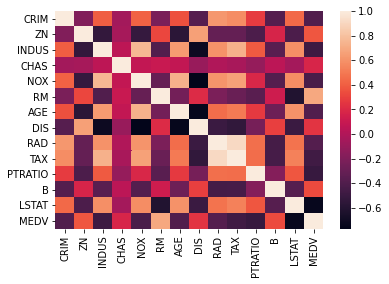

### תחשבו, על סמך הגרפים שהצגנו עד כה, איזה מאפיינים לדעתכם יכולים לעזור למודל שלנו ללמוד טוב יותר?
###  ZN ו CHAS הם המאפיינים היחידים שהייתי שוקל לא להשתמש בהם. הסיבה לכך היא העובדה שעבור CHAS - פחות מ25% מהערכים שונים מ-0, ועבור ZN, פחות מ50% מהערכים שונים מ0.

* ZN - החלטתי לוותר עליו בגלל אופי המאפיין. העובדה שעבור בתים קטנים הוא שווה ל 0 ועבור בתים גדולים הוא מתחיל ב0 ועולה ככל שיש שטח גדול יותר של קרקע בנויה יותר מגלים בתוכו שני מדדים שונים. הראשון הוא האם הבית מספיק גדול - מאפיין שאפשר להסיק מתוך כמות החדרים וכמות המס שמשלמים, והשני הוא בית גדול שאחוז מסויים ממנו בנוי. בית גדול שחלק מאוד קטן שלו בנוי יקבל את אותו ערך שבית קטן מקבל, דבר שיכול לגרום למודל לבלבול. בנוסף, בית גדול שחצי ממנו בנוי יקבל אותו ערך של בית יותר גדול עם אותו שטח בנוי (לבית הגדול יותר תהיה יותר גינה). בקיצור, לפי דעתי, מי שבנה את מאגר המידע הזה היה צריך לפצל את המאפיין ZN לשניים או שלושה מאפיינים שונים. אנחנו נוותר עליו.
* CHAS - יותר מ75% מהערכים הם 0, בשילוב עם העובדה שהקורלציה בינו לבין עלייה במחיר היא הנמוכה ביותר מבין כל המאפיינים גורמת לנו לחשוב על לוותר על המאפיין. אבל לאחר מחשבה שנייה, החלטתי להשאיר אותו בגלל שהוא מאוד ממוקד. בית שקרוב לנהר מעלה את ערכו, אפילו אם יש קצת כאלה. אין ערבוב עם מאפיינים שונים כמו שראינו ב ZN. 

### תיצרו מערך עם כל המאפיינים שנשתמש בהם כדי לחזות את ערך הבתים (הכל חוץ MEDV - המחיר, ומ ZN שויתרנו עליו)

In [36]:

features

['CRIM',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

### נשארנו עם 12 מאפיינים. ציירו 6 שורות של 2 גרפים. כל גרף מציג את הקורלציה שבין מאפיין מסויים למחיר.

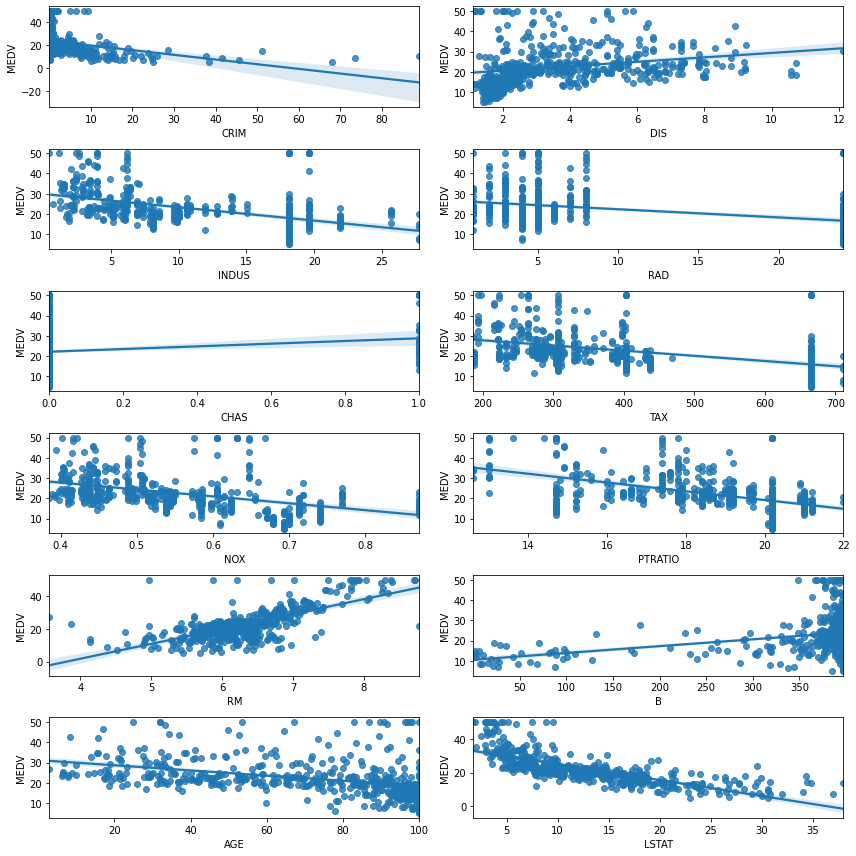

### זאת עוד נקודה שאפשר לבחון בה מאפיינים שהיינו רוצים לוותר עליהם.
### אנחנו נוותר על RAD, B. 

* Rad: יש עליה מסוימת בין 5 ל 8, ואז ירידה חדה בין 8 ל 30. זה סתם יבלבל את המודל
* B: עד B=350 יש קורלציה טובה, אבל החל מ350 זה רנדומלי לחלוטין. מה גם שרוב הנקודות הן מעל 350. יש כאן אפשרות ליצור מאפיין אחר: משתנה בדיד (קטגוריות). האם B בין 0 ל 100, האם B בין 100 ל 200, האם B בין 200 ל 300, האם B בין 300 ל 350 והאם B מעל 350. במצב כזה המודל ילמד ש 0 - 100 זה רע, 300-350 זה טוב, ומעל 350 לא משפיע. אנחנו נוותר כרגע כי זה feature engeeniring ברמה גבוהה, אך אתם מוזמנים לקחת את זה כתרגיל בונוס.

### תוציאו את B, RAD מהמאפיינים שנלמד איתם

In [38]:

features

['CRIM', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT']

### נבדוק האם יש NaN-ים ב data

In [39]:
data.shape

(506, 14)

In [40]:
data.dropna().shape

(394, 14)

### יש לנו 112 NaN-ים. אי אפשר להכניס שורה עם NaN למודל.
### תחשבו על האפשרויות שלנו. מה הייתם עושים?

### אופציה אחת היא להסתכל על כל מאפיין שיש בו NaN-ים, ולהבין האם אפשר להחליף אותם במשהו אחר (למשל 0, אם זה הגיוני)
### אופציה אחרת היא לבדוק האם יש מאפיין אחד או מספר קטן של מאפיינים שרוב השורות של ה NaN-ים קורים בגללם, ואם הם לא חשובים מאוד, אפשר אולי לוותר עליהם.

### תציגו את ה DataFrame של כל השורות שבהן יש NaN

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


### במבט ראשון אפשר לראות שב LSTAT יש הרבה NaN-ים וב CHAS יש NaN-ים
### תחשבו איך הייתם מטפלים בכל אחד מהמאפיינים הללו.

### ב CHAS הגיוני מאוד באיפה שיש NaN היה צריך להיות 0. זה פרמטר שאומר האם הדירה קרובה לנהר, אז אפשר לשער שהן פשוט לא קרובות. מצד שני, אפשר לחשוב שפשוט לא מילאו את האינפורמציה וזה לא אומר שהן לא קרובות לנהר. במקרה הזה אני חושב שבטוח למלא אותו באפסים.

### החליפו את ה NaN-ים של עמודת CHAS באפסים

In [60]:

data.CHAS.describe()

count    411.000000
mean       0.065693
std        0.248047
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: CHAS, dtype: float64

### ב LSTAT המצב בעייתי יותר. זה מאפיין מספרי ואין לנו שום אינדיקציה לסיבת היעדרותו. יש לנו 3 אפשרויות פעולה:
* לוותר עליו
* לא לוותר עליו, ולמחוק את כל השורות של data שבהן יש לו NaN
* להחליף את ה NaN-ים שבו בממוצע של הערכים שלו בשאר השורות.

### במקרה הזה, בגלל שיש הרבה NaN-ים, הייתי בדרך כלל מוותר עליו, אבל בגלל שהקורלציה שלו למחיר הדירה מאוד חזק, אני רוצה להשאיר אותו. זה משאיר אותנו עם שתי אופציות:
* למחוק את שורות data שבהן הוא NaN 
* להחליף את ה NaN-ים שבו בממוצע הערכים

נבדוק כמה NaN-ים הוא מכיל ולפי זה נחליט

### בדקו כמה NaN-ים יש למאפיין LSTAT

In [43]:
len(data[data.LSTAT.isna()])

20

### לא יותר מידי. אפשר למחוק את השורות הללו.
### תמחקו את השורות ב data שיש להן NaN במאפיין LSTAT

In [44]:

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


### תבדקו כמה שורות עם NaN-ים יש לנו עכשיו

75


### ירדנו מ112 ל75. ככה היינו ממשיכים, ומטפלים בכל מאפיין בתורו אם היינו מנסים להגיע לתוצאה האיכותית ביותר, אך כרגע מה שמעניין אותנו זה ללמוד על LinearRegression, אז פשוט נמחק את השורות הנותרות שמכילות NaN-ים ונמשיך לאימון המודל.

### תמחקו את השורות הנוספות שמכילות NaN-ים

In [46]:

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [47]:
data.shape

(411, 14)

### תצרו את X, Y מתוך data

In [49]:
X.head()

,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,LSTAT
0,0.00632,2.31,0.0,0.538,6.575,65.2,4.0900,296,15.3,4.98
1,0.02731,7.07,0.0,0.469,6.421,78.9,4.9671,242,17.8,9.14
2,0.02729,7.07,0.0,0.469,7.185,61.1,4.9671,242,17.8,4.03
3,0.03237,2.18,0.0,0.458,6.998,45.8,6.0622,222,18.7,2.94
5,0.02985,2.18,0.0,0.458,6.430,58.7,6.0622,222,18.7,5.21


In [50]:
Y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

### חלקו את המידע ל train, test כאשר 80% מהמידע יהיה train

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = 

In [52]:
X_train.shape

(328, 10)

In [53]:
X_test.shape

(83, 10)

### תיצרו אובייקט LinearRegression של sklearn

In [54]:
from sklearn.linear_model import LinearRegression
regressor = 
regressor

LinearRegression()

### תאמנו את המודל על X_train, Y_train

LinearRegression()

### תיצרו את התחזיות למכירי הבתים עבור ה test 

In [56]:
Y_pred = 
Y_pred

array([17.46507023, 15.42839633, 22.56907182, 15.79000783, 18.41681939,
       26.90777994, 19.12685033, 20.77381842, 14.55061306, 17.20493239,
       30.09180289, 31.88042949, 16.77201865, 30.86733953, 35.0366933 ,
       25.20028501, 27.28482871, 10.90686979, 20.03768403, 21.59247021,
       16.06541559, 19.50171832, 21.65256597, 25.76916492, 26.44149852,
       18.72730494, 39.12029771, 17.65087819, 18.69708411, 26.54532761,
       26.70690796, 16.58505436,  8.95956682, 14.62639051, 21.17338152,
       24.61909224, 31.50345542, 20.34620181, 11.60216858, 16.68336735,
       20.80822404, 15.41878444, 23.52185291, 20.60737353, 16.7996195 ,
       23.32710692, 11.81732998,  1.99539168, 27.03260359, 22.19354896,
       33.64716365, 18.53414138, 25.8909354 , 19.24392542, 16.19507442,
       20.5471625 , 17.20521285, 26.63205887, 25.99292305, 14.14952458,
       18.33031103, 21.23818345, 26.86729442, 19.8671899 , 22.52475613,
       28.44340422, 22.35251773, 29.17311034, 14.62791883, 17.23

### שרטטו גרף קורלציה בין Y_test, Y_pred

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MEDV'>

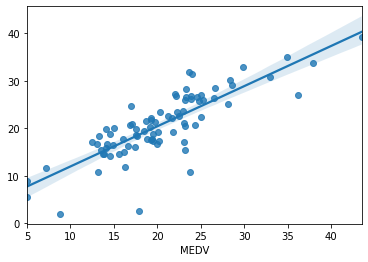

### חשבו את ה (Root Mean Squared Error) RMSE של המודל על ה test. 
### הסיבה שנרצה לחשב את הטעות שלנו היא כדי שנוכל להשוות את המודל שלנו למודלים אחרים (אולי גרסאות אחרות שלנו ואולי מודלים של אנשים אחרים) בלי הצורך להסתכל על גרפים ולהחליט מי נראה יותר מדוייק - יכול להיות קשה לעין האנושית

In [58]:
from sklearn.metrics import mean_squared_error

mse = 
rmse = 
rmse

4.041765009219211

### כל הכבוד! הנקודות מאוד קרובות לקו הרגרסיה! בנינו אחלה של מודל. אפשר להמשיך לפרק הבא :)